<a href="https://colab.research.google.com/github/MAUK9086/TDS_IITM/blob/main/Business_Analytics_GA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# New Section

In [2]:

from google.colab import files
uploaded = files.upload()


data = pd.read_csv("/content/data_transform.xlsx - data_1.csv")


Saving data_transform.xlsx - data_1.csv to data_transform.xlsx - data_1 (1).csv


In [3]:
data.head()

,Price,Sales
0,2.20,68.9
1,7.48,15.6
2,7.26,19.5
3,3.08,35.1
4,8.14,10.4


In [4]:
# Display the first few rows
print(data.head())

# Basic information about the dataset
print(data.info())

# Summary statistics
print(data.describe())


   Price  Sales
0   2.20   68.9
1   7.48   15.6
2   7.26   19.5
3   3.08   35.1
4   8.14   10.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   50 non-null     float64
 1   Sales   50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes
None
           Price      Sales
count  50.000000   50.00000
mean    5.024800   41.02800
std     2.165317   37.39749
min     1.760000    7.80000
25%     2.915000   18.52500
50%     5.170000   26.00000
75%     7.205000   52.97500
max     8.140000  188.50000


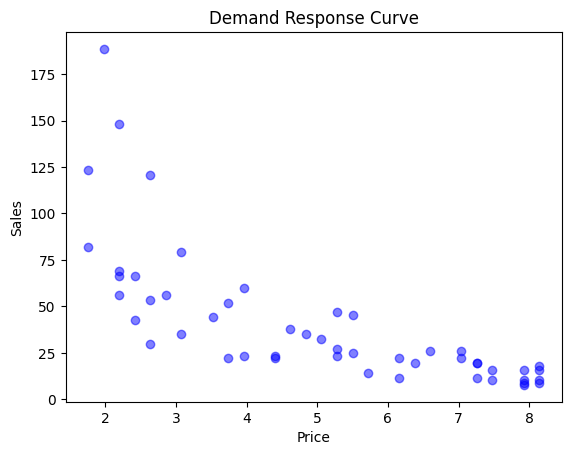

In [5]:
import matplotlib.pyplot as plt

# Scatter plot: Price vs Sales
plt.scatter(data['Price'], data['Sales'], color='blue', alpha=0.5)
plt.title("Demand Response Curve")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# Independent variable: Price
X = data[['Price']]  # Ensure this is a DataFrame
# Dependent variable: Sales
y = data['Sales']    # Ensure this is a Series

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
y_train.head()

,Sales
12,24.7
4,10.4
37,11.7
8,79.3
3,35.1


In [11]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient (Slope): -13.075063456004498
Intercept: 108.1581741641661


In [13]:
# Make predictions
y_pred = model.predict(X_test)



In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", round(r2,2))


Mean Squared Error: 211.53914781992407
R² Score: 0.36


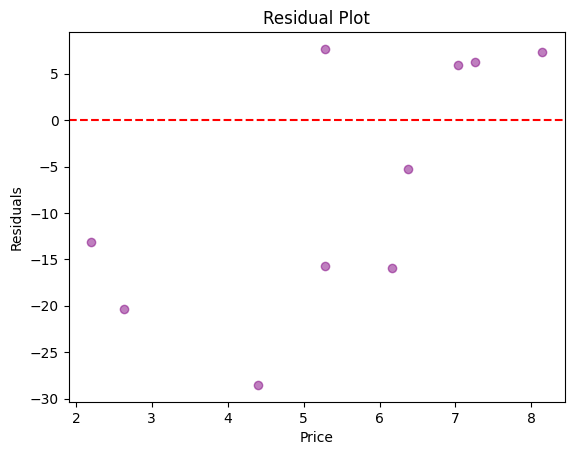

In [16]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(X_test, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Price")
plt.ylabel("Residuals")
plt.show()


In [20]:
# Print the intercept
intercept = model.intercept_
print("Intercept:", round(intercept,2))


Intercept: 108.16


In [22]:
# Print the slope (coefficient)
slope = model.coef_[0]
print("Slope:", round(slope,2))


Slope: -13.08


# New Section

In [23]:
import numpy as np

# Apply natural log transformation to both Price and Sales
data['Log_Price'] = np.log(data['Price'])
data['Log_Sales'] = np.log(data['Sales'])

# Check the transformed data
print(data[['Log_Price', 'Log_Sales']].head())


   Log_Price  Log_Sales
0   0.788457   4.232656
1   2.012233   2.747271
2   1.982380   2.970414
3   1.124930   3.558201
4   2.096790   2.341806


In [24]:
data.head()

,Price,Sales,Log_Price,Log_Sales
0,2.20,68.9,0.788457,4.232656
1,7.48,15.6,2.012233,2.747271
2,7.26,19.5,1.982380,2.970414
3,3.08,35.1,1.124930,3.558201
4,8.14,10.4,2.096790,2.341806


In [25]:
# Independent variable: Log_Price
X_log = data[['Log_Price']]
# Dependent variable: Log_Sales
y_log = data['Log_Sales']

# Split the data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Refit the Linear Regression Model
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# Print new coefficients and intercept
print("Log-Transformed Coefficient (Slope):", model_log.coef_[0])
print("Log-Transformed Intercept:", model_log.intercept_)


Log-Transformed Coefficient (Slope): -1.4021335815126421
Log-Transformed Intercept: 5.525489478759548


In [26]:
# Make predictions using the transformed model
y_pred_log = model_log.predict(X_test_log)

# Calculate R² and MSE for the transformed model
r2_log = r2_score(y_test_log, y_pred_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)

print("Log-Transformed R²:", r2_log)
print("Log-Transformed MSE:", mse_log)


Log-Transformed R²: 0.6743298126746489
Log-Transformed MSE: 0.11948013681199185


In [27]:
# Calculate R^2 score on the transformed dataset
r2_log = r2_score(y_test_log, y_pred_log)
print("R^2 on the transformed dataset:", round(r2_log,2))


R^2 on the transformed dataset: 0.67


In [28]:
# Print the intercept of the transformed model
intercept_log = model_log.intercept_
print("Intercept on the transformed dataset:", round(intercept_log,2))


Intercept on the transformed dataset: 5.53


In [30]:
# Print the slope of the transformed model
slope_log = model_log.coef_[0]
print("Slope on the transformed dataset:", round(slope_log,2))


Slope on the transformed dataset: -1.4




```
`# This is formatted as code`
```

# PANDYA MOTORS

In [34]:
from google.colab import files



X = pd.read_csv("/content/X.xlsx - Sheet1.csv")
y = pd.read_csv("/content/y.xlsx - Sheet1.csv")


In [35]:
X.head()


,Safety Features,Tech Features,Marketing Spend,Premium Hatchback,SUV
0,175349.20,116897.80,491784.10,0,1
1,172597.70,131377.59,463898.53,0,0
2,163441.51,81145.55,427934.54,1,0
3,154372.41,98671.85,403199.62,0,1
4,152107.34,71391.77,386168.42,1,0


In [36]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)




In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", round(r2,2))

Mean Squared Error: 83502864.03257743
R-squared: 0.93


In [43]:
# Get the intercept of the trained model
intercept = model.intercept_

# Print the intercept
print("Intercept:", round(intercept[0],2))


Intercept: 69744.99


In [48]:
# Define the new input values (X1, X2, X4, X5, X6)
new_data = [[1315.46, 115816.21,297114.46, 1, 0]]  # Assuming the new data is for the same set of features

# Use the trained model to make a prediction
predicted_profit = model.predict(new_data)

# Print the predicted profit
print("Predicted Profit:", round(predicted_profit[0][0],2))


Predicted Profit: 84489.11


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
